In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
pd.set_option("display.max_columns", None)
sns.set(style = "dark")

In [2]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 16.
plt.rcParams["ytick.labelsize"] = 16.
plt.rcParams["legend.fontsize"] = 12.

In [3]:
battles = pd.read_csv("battles.csv")
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [15., 7.]

### Number of battles fought per year

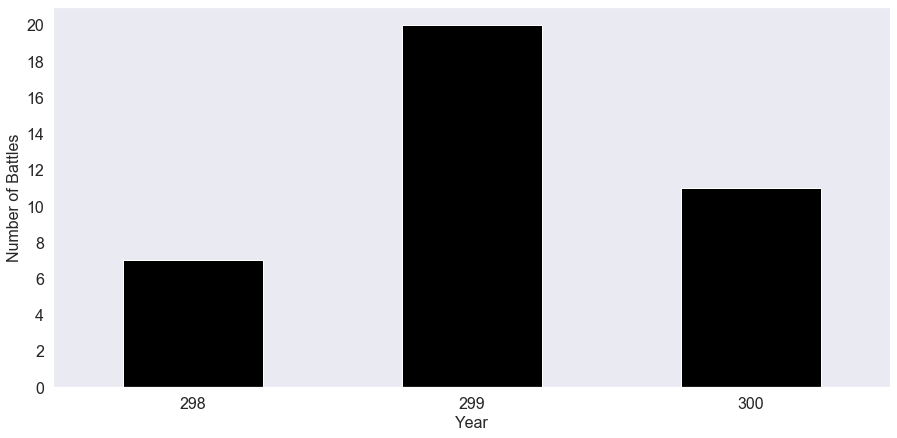

In [11]:
p = battles.groupby("year").count()["battle_number"].plot.bar(rot = 0, color = "black")
p = p.set(xlabel = "Year", ylabel = "Number of Battles"), plt.yticks(range(0, 21, 2))

### Number of Battles fought per Region

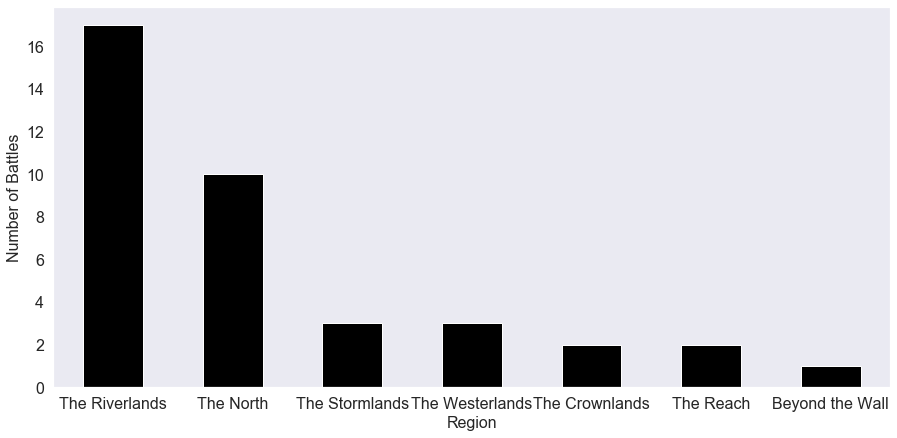

In [13]:
p = battles["region"].value_counts().plot.bar(rot = 0, color = "black")
p = p.set(ylabel = "Number of Battles",xlabel="Region")

### Number of battles kings fought and attacked

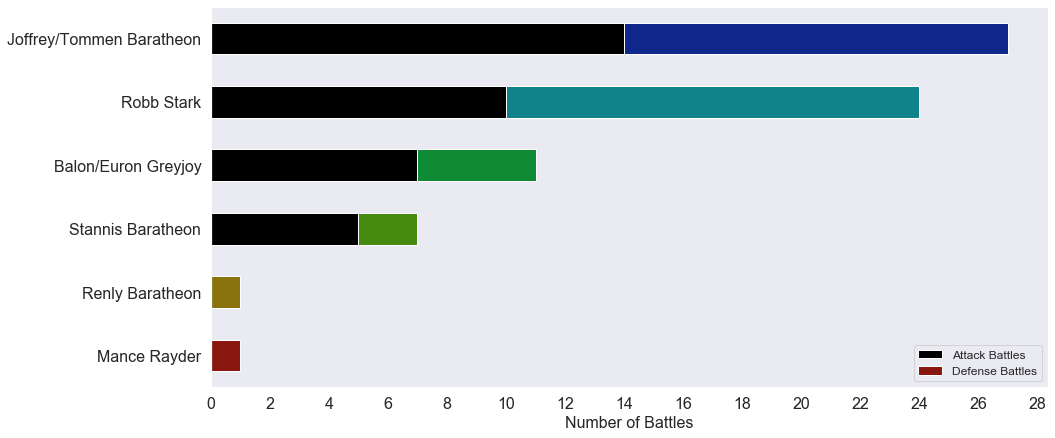

In [22]:
attacker = pd.DataFrame(battles.attacker_king.value_counts())
defender = pd.DataFrame(battles.defender_king.value_counts())
data = attacker.merge(defender, how = "outer", left_index = True, right_index = True).fillna(0)
data.loc[:, "Sum"] = data.attacker_king + data.defender_king



p = data.sort_values(["Sum", "attacker_king"]).loc[:, ["attacker_king", "defender_king"]].plot.barh(rot = 0, stacked = True, color = ["black", sns.hls_palette(8, l=.3, s=.8)])
plt.xticks(np.arange(0, max(data.Sum) + 2, 2))
_ = p.set(xlabel = "Number of Battles"), p.legend(["Attack Battles", "Defense Battles"])

### Attackers are having Advantage or not?

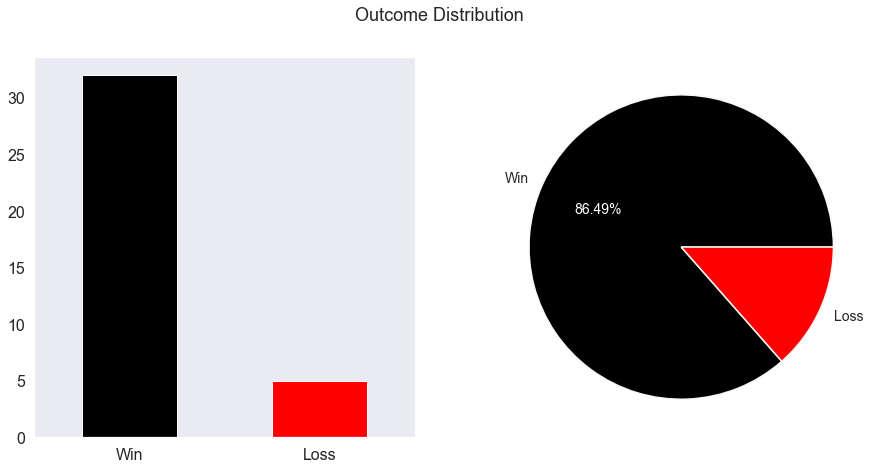

In [32]:
data = battles.loc[battles.attacker_outcome.notna()].copy(deep = True)
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Outcome Distribution", fontsize = 18.)

_ = data.attacker_outcome.value_counts().plot.pie(labels = ("Win", "Loss"), autopct = "%.2f%%", label = "", fontsize = 14., ax = ax[1],\
colors = ["Black", "red"], wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("white"), ax[1].texts[3].set_color("red")
_ = data.attacker_outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = ["Black", "red"]).set(xticklabels = ["Win", "Loss"])

### Impact of Army Size on Battle Outcome

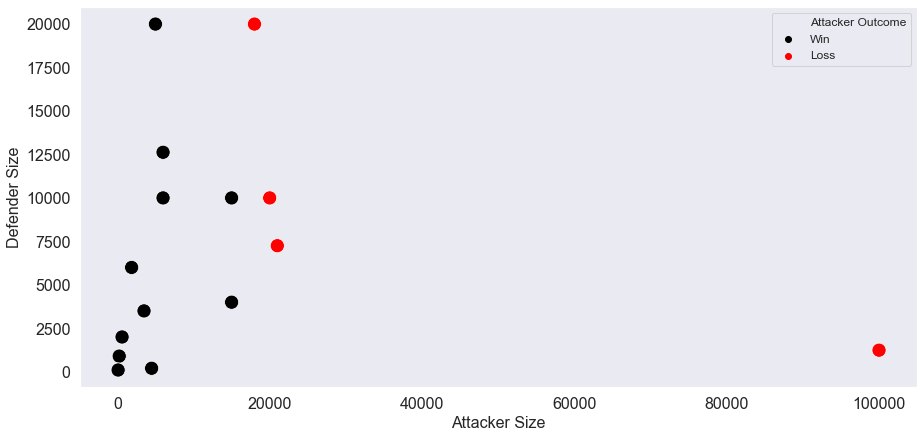

In [34]:
data = battles.dropna(subset = ["attacker_size", "defender_size", "attacker_outcome"]).copy(deep = True)
p = sns.scatterplot("attacker_size", "defender_size", hue = "attacker_outcome", palette = ["black", "red"], data = data, s = 200)
_ = p.set(xlabel = "Attacker Size", ylabel = "Defender Size")
legend = p.legend()
legend.texts[0].set_text("Attacker Outcome")
legend.texts[1].set_text("Win")
legend.texts[2].set_text("Loss")

### Battle with highest Attacker size

Text(0, 0.5, 'Attacker size')

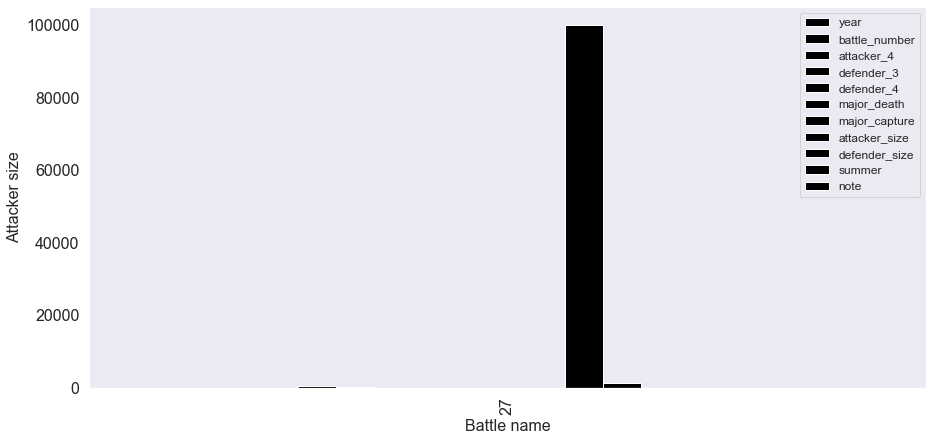

In [41]:
data.loc[data.attacker_size == max(data.attacker_size)].plot(kind="bar",color="black")
plt.xlabel("Battle name")
plt.ylabel("Attacker size")

### Commander Who Fought the Most Battles

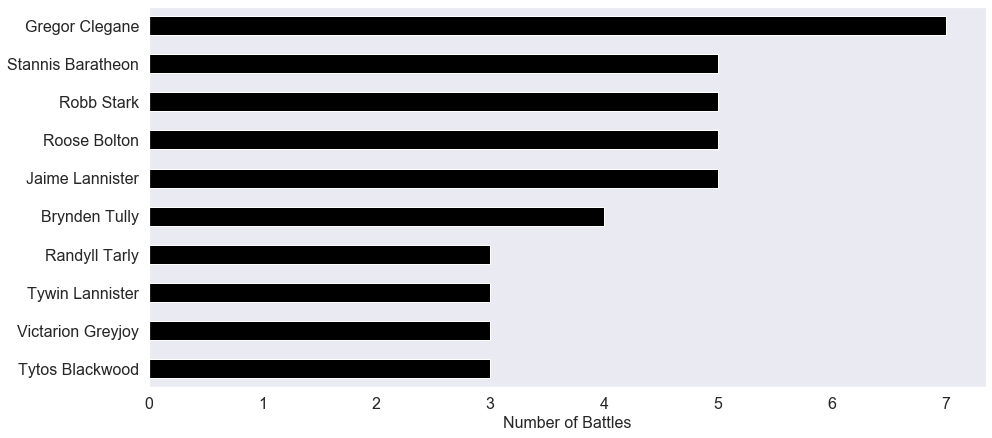

In [42]:
attacker = battles.dropna(subset = ["attacker_commander"]).copy(deep = True)
defender = battles.dropna(subset = ["defender_commander"]).copy(deep = True)

d = {}

for names in attacker["attacker_commander"].values:
    name_lst = names.split(", ")
    for name in name_lst:
        d[name] = d.get(name, 0) + 1

for names in defender["defender_commander"].values:
    name_lst = names.split(", ")
    for name in name_lst:
        d[name] = d.get(name, 0) + 1
        
data  = pd.DataFrame.from_dict(d, orient = "index", columns = ["Count"])
p = data.loc[data.Count > 2].sort_values("Count").plot.barh(color = "black")
plt.xticks(np.arange(0, max(data.Count) + 1, 1))
_ = p.set(xlabel = "Number of Battles"), p.legend().remove()

### Commander Who Won the Most Battles

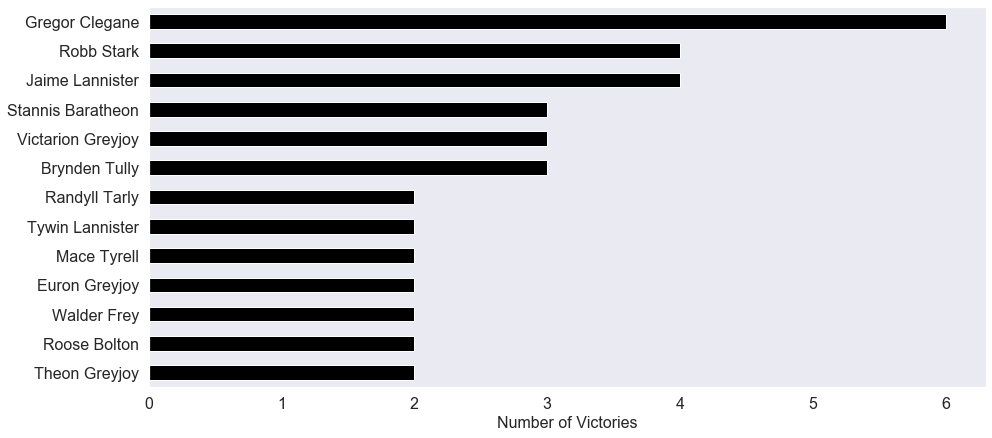

In [45]:
attacker = battles.dropna(subset = ["attacker_commander", "attacker_outcome"]).copy(deep = True)
defender = battles.dropna(subset = ["defender_commander", "attacker_outcome"]).copy(deep = True)

d = {}

for pair in attacker[["attacker_commander", "attacker_outcome"]].values:
    name_lst, outcome = pair[0].split(", "), pair[1]
    for name in name_lst:
        if outcome == "win":
            d[name] = d.get(name, 0) + 1

for pair in defender[["defender_commander", "attacker_outcome"]].values:
    name_lst, outcome = pair[0].split(", "), pair[1]
    for name in name_lst:
        if outcome == "loss":
            d[name] = d.get(name, 0) + 1

data  = pd.DataFrame.from_dict(d, orient = "index", columns = ["Count"])
p = data.loc[data.Count > 1].sort_values("Count").plot.barh(color = "black")
plt.xticks(np.arange(0, max(data.Count) + 1, 1))
_ = p.set(xlabel = "Number of Victories"), p.legend().remove()